## Mounting drive and adjustments

In [116]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/proofpoint")
os.getcwd() 

'/content/gdrive/My Drive/Colab Notebooks/proofpoint'

In [3]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import csv
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


## Loading the data

In [105]:
features_dataset=pd.read_csv('train_features.csv', header=None)
labels_dataset=pd.read_csv('train_labels.csv', header=None)
print('Features dataset shape is: ' + str(features_dataset.shape))
print('Labels dataset shape is: '+ str(labels_dataset.shape))

Features dataset shape is: (140, 903)
Labels dataset shape is: (140, 1)


## Data exploration

In [106]:
features_dataset.describe()

,3,4,5,6,7,8,9,10,11,12,...,893,894,895,896,897,898,899,900,901,902
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,-3.706226,0.620541,-0.691226,-2.883438,0.798445,0.276561,0.382528,-0.890959,-1.694734,-0.719966,...,-1.508409,-1.576743,0.190566,0.665053,-0.774684,0.931779,0.791181,-0.458641,0.723416,-0.132218
std,4.064704,3.014747,3.295262,3.331956,3.484214,3.203680,3.114446,3.221021,3.639898,3.124935,...,3.125331,3.262723,3.429600,3.092077,3.462897,3.301253,3.131848,2.616963,3.382829,3.657816
min,-12.753200,-8.020900,-9.688800,-10.540100,-8.493400,-6.525400,-8.397000,-8.372300,-10.153200,-10.185400,...,-8.152700,-10.229800,-8.713400,-9.106600,-11.294900,-7.695700,-7.090500,-6.851600,-6.184400,-9.723500
25%,-6.393700,-1.665500,-2.625975,-5.215000,-1.934025,-1.833875,-1.871550,-2.941725,-3.986725,-2.876275,...,-3.739425,-3.837325,-2.248525,-1.361275,-3.141325,-0.960575,-1.299400,-2.491375,-1.769575,-2.728575
50%,-4.022400,0.559550,-0.651150,-3.022050,1.005600,0.309250,0.454450,-0.826550,-1.664150,-0.940650,...,-1.873850,-1.594600,0.274000,0.456750,-1.232550,1.210100,0.785650,-0.055900,0.350250,0.200050
75%,-0.860025,2.784550,1.432475,-0.441100,3.353100,2.432525,2.270475,1.324300,0.575900,1.441625,...,0.490925,0.554300,2.449825,2.790450,1.842575,3.121575,2.618375,1.136900,3.384000,2.175950
max,7.862500,9.077900,7.729800,5.230100,10.856000,8.125200,9.032900,8.249100,7.994100,7.576900,...,7.073000,6.822000,11.433600,9.259000,7.385900,12.639000,9.713000,5.019900,8.439900,9.632300


In [107]:
features_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,893,894,895,896,897,898,899,900,901,902
0,right,type_3,green,0.8827,3.2917,1.4651,-4.5278,1.0490,2.3398,1.8729,...,0.8854,-0.8752,0.2662,4.9686,2.5588,-0.6121,-3.3692,0.0550,-1.5296,-5.3041
1,left,type_2,blue,1.4458,-2.9575,-1.2341,-3.9684,-2.7645,5.6346,1.7838,...,-4.3774,-2.2512,-1.6331,7.2724,1.7616,4.2826,5.5557,1.0588,2.6734,-4.5224
2,right,type_2,green,-10.2982,-0.3714,-0.9886,-3.2219,4.0925,-0.8319,-3.0588,...,-1.4408,-2.5580,-1.2116,5.1098,-0.6747,-1.2528,-2.2944,-3.4745,2.8633,1.6737
3,right,type_1,red,-8.4566,-0.2408,-3.0342,2.9534,2.8977,0.8851,3.0113,...,0.9434,-0.8771,0.4143,4.3368,-11.2949,-7.4289,7.9900,-6.2433,1.6592,-4.8601
4,left,type_1,blue,4.2681,-2.2052,-5.9093,0.1036,1.8462,1.9801,2.1129,...,-0.2290,0.5390,0.7648,1.1348,1.9829,3.7682,-1.7092,1.4791,5.7732,-3.9106


In [108]:
features_dataset.isnull().values.any() #check for missing values

False

In [109]:
#Counting values for categorical
from collections import Counter
print('first col')
print(Counter(features_dataset[0]).keys())
print(Counter(features_dataset[0]).values())
print('second col')
print(Counter(features_dataset[1]).keys())
print(Counter(features_dataset[1]).values())
print('third col')
print(Counter(features_dataset[2]).keys())
print(Counter(features_dataset[2]).values())

first col
dict_keys(['right', 'left'])
dict_values([61, 79])
second col
dict_keys(['type_3', 'type_2', 'type_1'])
dict_values([64, 32, 44])
third col
dict_keys(['green', 'blue', 'red'])
dict_values([51, 36, 53])


## Convert categorical and labels to one-hot

In [0]:
#converts the labels to one-hot
y_cat = to_categorical(labels_dataset.iloc[:,:]) 

# Get one hot encoding of columns 1-3 in the feature dataset
one_hot = pd.get_dummies(features_dataset.iloc[:,:3])

# Drop columns 1-3 as it is now encoded
features_dataset = features_dataset.drop(features_dataset.iloc[:,:3],axis = 1)

# Join the encoded df
features_dataset = features_dataset.join(one_hot)

In [111]:
#Check new shape
features_dataset.shape

(140, 908)

## Prepare Test and Train Data


In [0]:
features, labels = features_dataset, y_cat

train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels,
        train_size=0.7, #70% training and 30% testing 
        test_size=0.3,
        random_state=12, #Allow for reproducible results 
        # keep same proportion of 'target' in test and target data
        stratify=labels
    )

## Grid search for hyperparameters

In [0]:
#Tune the batch size and epochs

#Define model
def create_model():
  model = Sequential()
  model.add(Dense(5,input_shape=(908,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  #Compile
  model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters for Batch Size and Number of Epochs
batch_size = [5, 10, 15, 20, 25]
epochs = [10, 20, 30, 40]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_features, train_labels, validation_data=(test_features, test_labels),verbose=1)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Instructions for updating:
Use tf.cast instead.
Train on 98 samples, validate on 42 samples
Epoch 1/20
98/98 [==============================] - 1s 10ms/step - loss: 1.4079 - acc: 0.4796 - val_loss: 1.3979 - val_acc: 0.4048
Epoch 2/20
98/98 [==============================] - 0s 274us/step - loss: 1.4177 - acc: 0.5408 - val_loss: 1.2768 - val_acc: 0.4762
Epoch 3/20
98/98 [==============================] - 0s 279us/step - loss: 1.3880 - acc: 0.5000 - val_loss: 1.1525 - val_acc: 0.5238
Epoch 4/20
98/98 [==============================] - 0s 298us/step - loss: 1.4751 - acc: 0.5408 - val_loss: 1.1029 - val_acc: 0.5238
Epoch 5/20
98/98 [==============================] - 0s 280us/step - loss: 1.1681 - acc: 0.5714 - val_loss: 1.0972 - val_acc: 0.5238
Epoch 6/20
98/98 [==============================] - 0s 292us/step - loss: 1.0741 - acc: 0.5204 - val_loss: 1.0905 - val_acc: 0.5238
Epoch 7/20
98/98 [==============================] - 0s 310us/step - loss: 1.0518 - acc: 0.5510 - val_loss: 1.0866 - v

In [113]:
#Tune the Training Optimization Algorithm

def create_model(optimizer='adam'):
  model = Sequential()
  model.add(Dense(5,input_shape=(908,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(7, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  #Compile
  model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=25, verbose=0)

# define the grid search parameters for Batch Size and Number of Epochs
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_features, train_labels, validation_data=(test_features, test_labels),verbose=1)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 98 samples, validate on 42 samples
Epoch 1/20
98/98 [==============================] - 3s 31ms/step - loss: 1.4598 - acc: 0.4388 - val_loss: 1.3296 - val_acc: 0.3810
Epoch 2/20
98/98 [==============================] - 0s 318us/step - loss: 1.3192 - acc: 0.4694 - val_loss: 1.2722 - val_acc: 0.3810
Epoch 3/20
98/98 [==============================] - 0s 313us/step - loss: 1.2085 - acc: 0.5102 - val_loss: 1.2406 - val_acc: 0.3810
Epoch 4/20
98/98 [==============================] - 0s 291us/step - loss: 1.2635 - acc: 0.5204 - val_loss: 1.2411 - val_acc: 0.3810
Epoch 5/20
98/98 [==============================] - 0s 284us/step - loss: 1.0218 - acc: 0.5102 - val_loss: 1.2445 - val_acc: 0.4286
Epoch 6/20
98/98 [==============================] - 0s 298us/step - loss: 1.0142 - acc: 0.5612 - val_loss: 1.2328 - val_acc: 0.4524
Epoch 7/20
98/98 [==============================] - 0s 334us/step - loss: 1.0739 - acc: 0.5306 - val_loss: 1.2232 - val_acc: 0.4762
Epoch 8/20
98/98 [===============

In [0]:
# Tune the Number of Neurons in the Hidden Layer

def create_model(neurons1=1,neurons2=1):
  model = Sequential()
  model.add(Dense(neurons1,input_shape=(908,), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(neurons2, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  
  #Compile
  model.compile('RMSprop', 'categorical_crossentropy', metrics=['accuracy'])
  return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=25, verbose=0)

# define the grid search parameters
neurons1 = [3,4 ,5,6,7,8,9,10,11,12,13,14 ,15,16]
neurons2 = [3,4 ,5,6,7,8,9,10,11,12,13,14,15,16]

param_grid = dict(neurons1=neurons1, neurons2=neurons2 )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(train_features, train_labels, validation_data=(test_features, test_labels),verbose=0)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.602041 using {'neurons1': 3, 'neurons2': 10}
0.540816 (0.050181) with: {'neurons1': 3, 'neurons2': 3}
0.591837 (0.054836) with: {'neurons1': 3, 'neurons2': 4}
0.520408 (0.025989) with: {'neurons1': 3, 'neurons2': 5}
0.479592 (0.063774) with: {'neurons1': 3, 'neurons2': 6}
0.571429 (0.006217) with: {'neurons1': 3, 'neurons2': 7}
0.500000 (0.057318) with: {'neurons1': 3, 'neurons2': 8}
0.500000 (0.126231) with: {'neurons1': 3, 'neurons2': 9}
0.602041 (0.040584) with: {'neurons1': 3, 'neurons2': 10}
0.540816 (0.070653) with: {'neurons1': 3, 'neurons2': 11}
0.520408 (0.025989) with: {'neurons1': 3, 'neurons2': 12}
0.510204 (0.047166) with: {'neurons1': 3, 'neurons2': 13}
0.561224 (0.075383) with: {'neurons1': 3, 'neurons2': 14}
0.469388 (0.054112) with: {'neurons1': 3, 'neurons2': 15}
0.510204 (0.050241) with: {'neurons1': 3, 'neurons2': 16}
0.520408 (0.157707) with: {'neurons1': 4, 'neurons2': 3}
0.479592 (0.025989) with: {'neurons1': 4, 'neurons2': 4}
0.510204 (0.102451) with: {'

In [0]:
#Run the model with the optimal parameters
model = Sequential()
model.add(Dense(5,input_shape=(908,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

#Compile
model.compile('RMSprop', 'categorical_crossentropy', metrics=['accuracy'])

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
#fit
history=model.fit(train_features, train_labels, validation_data=(test_features, test_labels),verbose=1,epochs=251, callbacks=callbacks_list) 

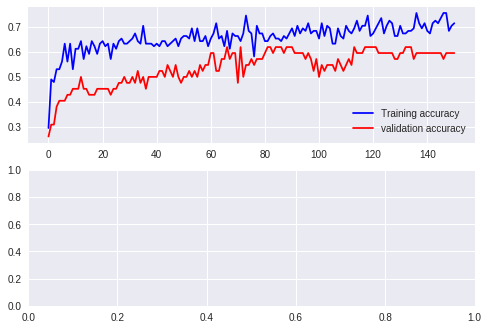

In [93]:
#Virtualize Training
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r', label="validation accuracy",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

## Testing the model on the entire dataset with the best weights

In [100]:
#Loading Check-Pointed
#The checkpoint only includes the model weights. It assumes you know the network structure.

model = Sequential()
model.add(Dense(5,input_shape=(908,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# load weights
model.load_weights("weights.best.hdf5")

#Compile
model.compile('RMSprop', 'categorical_crossentropy', metrics=['accuracy'])
print("Created model and loaded weights from file")

# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(train_features, train_labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
acc: 77.55%


## Preparing testing data

In [94]:
#Load testing data
testing_data=pd.read_csv('test_features.csv', header=None)
print('Test dataset shape is: ' + str(testing_data.shape))


Test dataset shape is: (560, 903)


In [0]:
# Get one hot encoding of columns 1-3 in the testing dataset
one_hot = pd.get_dummies(testing_data.iloc[:,:3])

# Drop columns 1-3 as it is now encoded
testing_data = testing_data.drop(testing_data.iloc[:,:3],axis = 1)

# Join the encoded df
testing_data = testing_data.join(one_hot)

## Predict

In [96]:
#After the model has been train we can make predictions

y_pred = model.predict(testing_data)
y_pred.shape

(560, 3)

In [97]:
y_pred

array([[0.24498188, 0.42839113, 0.326627  ],
       [0.01970868, 0.32594743, 0.6543439 ],
       [0.46152616, 0.26516986, 0.273304  ],
       ...,
       [0.01410408, 0.2970675 , 0.68882847],
       [0.6405557 , 0.32041278, 0.03903149],
       [0.06898094, 0.40784532, 0.52317375]], dtype=float32)

## Convert the probabilities to values


In [0]:
answers=[]
i=0

for row in y_pred:
  max_value = max(y_pred[i])
  max_index = list(y_pred[i]).index(max_value)
  answers.append(max_index)
  i+=1

## Check that we got 560 answers

In [0]:
len(answers)

560

## Explore answers


In [0]:
answers

## Save to CSV file


In [0]:
with open('test_predictions.csv', "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in answers:
        writer.writerow([val])    


## Check counts

In [115]:
my_dict = {i:answers.count(i) for i in answers}
print (my_dict)

{1: 455, 2: 105}
